# Random Forest

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from src.randomforest import RandomForest
import src.utils as utils

### Without outliers

In [2]:
df = pd.read_csv("data/diamonds.csv")
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(df)

In [7]:
param_grid = {
	"n_estimators": [10, 50, 100, 200],
	"max_depth": [2, 3, 4],
	"bootstrap": [True, False]
}

grid_search = GridSearchCV(RandomForest(), param_grid, cv=5, scoring="accuracy", return_train_score=True, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START bootstrap=True, max_depth=2, n_estimators=10...............
[CV 1/5; 1/24] END bootstrap=True, max_depth=2, n_estimators=10;, score=(train=0.578, test=0.577) total time=   0.0s
[CV 2/5; 1/24] START bootstrap=True, max_depth=2, n_estimators=10...............
[CV 2/5; 1/24] END bootstrap=True, max_depth=2, n_estimators=10;, score=(train=0.576, test=0.573) total time=   0.0s
[CV 3/5; 1/24] START bootstrap=True, max_depth=2, n_estimators=10...............
[CV 3/5; 1/24] END bootstrap=True, max_depth=2, n_estimators=10;, score=(train=0.575, test=0.581) total time=   0.0s
[CV 4/5; 1/24] START bootstrap=True, max_depth=2, n_estimators=10...............
[CV 4/5; 1/24] END bootstrap=True, max_depth=2, n_estimators=10;, score=(train=0.577, test=0.575) total time=   0.0s
[CV 5/5; 1/24] START bootstrap=True, max_depth=2, n_estimators=10...............
[CV 5/5; 1/24] END bootstrap=True, max_depth=2, n_estimators=10;,

GridSearchCV(cv=5, estimator=RandomForest(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [8]:
sorted(zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]), reverse=True)

[(0.7172084383707045,
  {'bootstrap': False, 'max_depth': 4, 'n_estimators': 200}),
 (0.717181902613772, {'bootstrap': True, 'max_depth': 4, 'n_estimators': 100}),
 (0.7171553668568396,
  {'bootstrap': True, 'max_depth': 4, 'n_estimators': 200}),
 (0.7169961523152447,
  {'bootstrap': False, 'max_depth': 4, 'n_estimators': 100}),
 (0.7169165450444475,
  {'bootstrap': False, 'max_depth': 4, 'n_estimators': 50}),
 (0.7167042589889877, {'bootstrap': True, 'max_depth': 4, 'n_estimators': 50}),
 (0.7164389014196629, {'bootstrap': True, 'max_depth': 4, 'n_estimators': 10}),
 (0.7161470080934059,
  {'bootstrap': False, 'max_depth': 3, 'n_estimators': 50}),
 (0.7161204723364734,
  {'bootstrap': True, 'max_depth': 3, 'n_estimators': 200}),
 (0.7160674008226084,
  {'bootstrap': False, 'max_depth': 3, 'n_estimators': 200}),
 (0.7159347220379462, {'bootstrap': True, 'max_depth': 3, 'n_estimators': 50}),
 (0.7159081862810136,
  {'bootstrap': False, 'max_depth': 3, 'n_estimators': 100}),
 (0.71582857

From this grid search, we conclude that the `max_depth` is the one increasing the most the accuracy (up to 0.71), followed by the `n_estimators`, both directly proportionally. `bootstrap` is not influencing that much, so we will set it to `True`, as we think it might be more beneficial to avoid overfitting. Also, altough higher `n_estimators` do increase the accuracy, the difference between 100 and 200 is insignificant, so we will use 100 as it's less computationally expensive.  
First, we show that increasing `n_estimators` a lot still doesn't improve the accuracy.

In [31]:
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(df)
model = RandomForest(n_estimators=5000, max_depth=3, bootstrap=True)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.cross_validation(X_train, y_train, 5, 0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.6s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   56.8s remaining:   37.9s


Cross validation (accuracy) scores:
	mean: 0.718205024855569 std: 0.006377293900250426


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


It didn't. Now we continue the analysis with 100 trees.

In [3]:
model = RandomForest(n_estimators=100, max_depth=4, bootstrap=True)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

c:\Users\pikur\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pikur\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pikur\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.7146079341913228,
 'precision': 0.5635555990568771,
 'recall': 0.5134250547585308,
 'f1': 0.5045873324804544}

The warning says us that the model is predicting no samples for some classes.

In [4]:
y_train2.value_counts()

4    12835
3     7679
2     7037
1     2387
0      210
Name: cut, dtype: int64

We can see that there are very few samples for class `0` in the training set, which the model might be missing, and it's not reflected in the accuracy at all.  
We will train the Random Forest again, this time with `class_weight = "balanced"`, so that classes with low frequency have more weigth.

In [5]:
model = RandomForest(n_estimators=100, max_depth=4, bootstrap=True, class_weight="balanced")
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.6939100437839989,
 'precision': 0.6498287130739284,
 'recall': 0.6567486459175618,
 'f1': 0.587211732930613}

We observe that accuracy decreases a bit, while the other metrics increase.

In [6]:
pd.Series(model.predict(X_val)).value_counts()


4    3861
3    2667
1     857
2     100
0      52
dtype: int64

Indeed, the frequency of each class in the predictions is proportional to the frequency in the training set.

Finally, as we observed, increasing the `max_depth` yields better results, so we will increase it exagerately to see to what end we can bring this Random Forest.  
As we try a big range of parameters, we use Randomized Search to accelerate the process.

In [55]:
param_grid = {
	"max_depth": list(range(5, 25)),
}

random_search = RandomizedSearchCV(RandomForest(class_weight="balanced"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, verbose=10, n_iter=10)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=6................................................
[CV 1/5; 1/10] END max_depth=6;, score=(train=0.703, test=0.698) total time=   0.5s
[CV 2/5; 1/10] START max_depth=6................................................
[CV 2/5; 1/10] END max_depth=6;, score=(train=0.699, test=0.703) total time=   0.4s
[CV 3/5; 1/10] START max_depth=6................................................
[CV 3/5; 1/10] END max_depth=6;, score=(train=0.699, test=0.695) total time=   0.4s
[CV 4/5; 1/10] START max_depth=6................................................
[CV 4/5; 1/10] END max_depth=6;, score=(train=0.700, test=0.701) total time=   0.5s
[CV 5/5; 1/10] START max_depth=6................................................
[CV 5/5; 1/10] END max_depth=6;, score=(train=0.702, test=0.694) total time=   0.4s
[CV 1/5; 2/10] START max_depth=18...............................................
[CV 1/5; 2/10] END max_depth=18;,

RandomizedSearchCV(cv=5, estimator=RandomForest(class_weight='balanced'),
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [56]:
sorted(zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]), reverse=True)

[(0.78214143558445, {'max_depth': 23}),
 (0.7820883640705851, {'max_depth': 20}),
 (0.7819291495289903, {'max_depth': 24}),
 (0.7819026137720579, {'max_depth': 22}),
 (0.7811330768210164, {'max_depth': 18}),
 (0.7772057847950112, {'max_depth': 16}),
 (0.761549688204856, {'max_depth': 12}),
 (0.7445668037680775, {'max_depth': 10}),
 (0.7025607005439831, {'max_depth': 7}),
 (0.6982884436778558, {'max_depth': 6})]

Values of `max_depth` over 20 seem to achieve the most accuracy in the validation set, despite highly overfitting the training set. We will now compare the metrics of setting `max_depth` to 16 and to 24.

In [7]:
model_24 = RandomForest(n_estimators=100, max_depth=24, bootstrap=True, class_weight="balanced")
model_24.fit(X_train2, y_train2)
model_24.compute_metrics(X_val, y_val)

{'accuracy': 0.7810800053071514,
 'precision': 0.7815104043045576,
 'recall': 0.7267601113942389,
 'f1': 0.7489894493280119}

In [8]:
model_16 = RandomForest(n_estimators=100, max_depth=16, bootstrap=True, class_weight="balanced")
model_16.fit(X_train2, y_train2)
model_16.compute_metrics(X_val, y_val)

{'accuracy': 0.7773649993366061,
 'precision': 0.7744753142851063,
 'recall': 0.7255917931869048,
 'f1': 0.7428291679142989}

In [9]:
_ = model_24.compare(model_16, X_val, y_val)

accuracy 0.0037150059705453042
precision 0.007035090019451351
recall 0.0011683182073340959
f1 0.0061602814137130535
confusion matrix [[  1  -1   0   0   0]
 [  0 -31  38  -7   0]
 [  0 -29  82 -56   3]
 [  0  -1  33 -31  -1]
 [  0  -2  14 -19   7]]


The comparison shows us that `model_24` has very similar metrics than `model_16`. The lines of zeros in the **difference** confusion matrix suggests that both model perform equally good in the class 0 (the one with few samples), so we are happy.  
Actually, the difference between both is very small, so we will take `max_depth = 16` as it's less computationally expensive and less complex.

### With outliers
Here we experiment by including outliers and training the model with them. We think that choosing bagging vs pasting can be even more significant this time, we will check it.

In [7]:
X_train, X_test, y_train, y_test = utils.preprocessing_LS(df)

param_grid = {
	"bootstrap": [True, False]
}

grid_search = GridSearchCV(RandomForest(max_depth=16, class_weight="balanced"), param_grid, cv=5, scoring="accuracy", return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForest(class_weight='balanced', max_depth=16),
             n_jobs=-1, param_grid={'bootstrap': [True, False]},
             return_train_score=True, scoring='accuracy')

In [8]:
sorted(zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]), reverse=True)

[(0.7736142550103355, {'bootstrap': True}),
 (0.7717371199479952, {'bootstrap': False})]

We were wrong, choosing bagging or pasting is not significant in this case. Maybe this time the model needs a different maximum tree depth.

In [35]:
param_grid = {
	"max_depth": list(range(12, 25)),
}

grid_search = GridSearchCV(RandomForest(class_weight="balanced"), param_grid, cv=5, scoring="accuracy", 
								   return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForest(class_weight='balanced'), n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                       22, 23, 24]},
             return_train_score=True, scoring='accuracy')

In [36]:
sorted(zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]), reverse=True)

[(0.780473608766696, {'max_depth': 23}),
 (0.7801260674388704, {'max_depth': 24}),
 (0.779523558468336, {'max_depth': 21}),
 (0.7790368813915938, {'max_depth': 22}),
 (0.7779477302504259, {'max_depth': 20}),
 (0.7772061714537039, {'max_depth': 19}),
 (0.7757462207760353, {'max_depth': 18}),
 (0.774031340046852, {'max_depth': 17}),
 (0.7736142550103355, {'max_depth': 16}),
 (0.7707638893084334, {'max_depth': 15}),
 (0.7658046173531959, {'max_depth': 14}),
 (0.7604746505797838, {'max_depth': 13}),
 (0.754403052512347, {'max_depth': 12})]

The difference in accuracy is very low. For the same reason as before, we will stay with 16.

In [10]:
model = RandomForest(n_estimators=100, max_depth=16, bootstrap=True, class_weight="balanced")
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train2, y_train2)
model.compute_metrics(X_val, y_val)

{'accuracy': 0.7773649993366061,
 'precision': 0.7744753142851063,
 'recall': 0.7255917931869048,
 'f1': 0.7428291679142989}

Overall, training with outliers didn't change the metrics of the model much. The precision slightly decreased and the recall slightly increased.  
We believe that outliers in this dataset are more likely rare diamonds than measurement errors, as this is a very meticulous field of study. So, if the model is able to generalize despite these outliers, we should keep it, as real world samples may also contain rare diamonds.

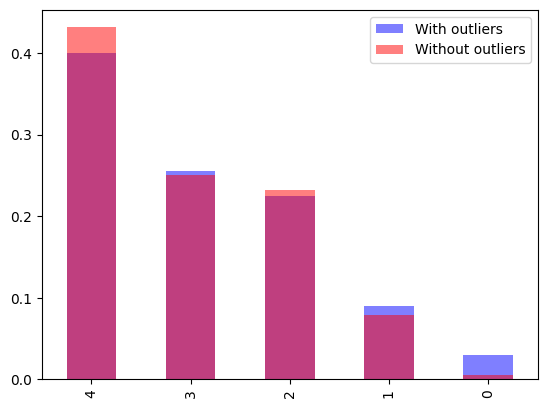

In [20]:
import matplotlib.pyplot as plt

X_train_o, X_test_o, y_train_o, y_test_o = utils.preprocessing_LS(df)
X_train_no, X_test_no, y_train_no, y_test_no = utils.preprocessing_LOS(df)
outliers_percentage_o = y_train_o.value_counts(normalize=True)
outliers_percentage_no = y_train_no.value_counts(normalize=True)

plt.figure()
outliers_percentage_o.plot.bar(color='b', alpha=0.5, label='With outliers')
outliers_percentage_no.plot.bar(color='r', alpha=0.5, label='Without outliers')
plt.legend()
plt.show()

Moreover, we see that class 0 losses a lot of observations if we remove outliers, so it's good if we have a model that can classify more confidently this class, that other models struggled with due to having few samples.

### Final test
We test the model with outliers.

In [15]:
X_train, X_test, y_train, y_test = utils.preprocessing_LS(df)
model = RandomForest(n_estimators=100, max_depth=16, bootstrap=True, class_weight="balanced")
model.fit(X_train, y_train)
model.compute_metrics(X_test, y_test)

{'accuracy': 0.753615127919911,
 'precision': 0.7647340744860867,
 'recall': 0.7305996146062969,
 'f1': 0.7371562742692406}

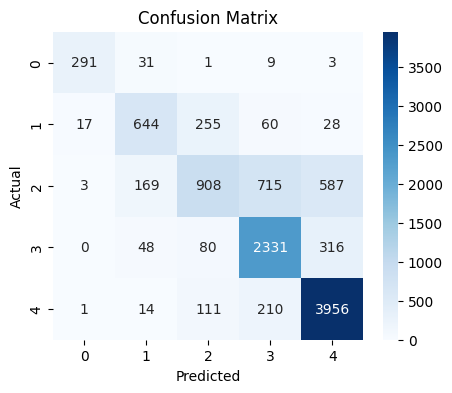

In [17]:
import seaborn as sns

conf_mat = model.conf_matrix(X_test, y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

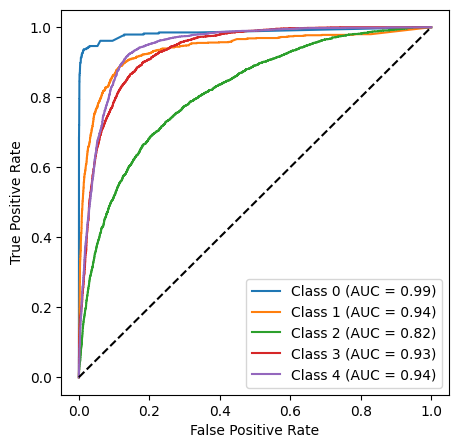

In [18]:
model.roc_curve(X_test, y_test)

Random Forest achieves a high AUC in all classes, except with class 2, a target that we observed other models also struggled with. Overall, it generalizes quite well despite the presence of important outliers.